In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv("Data.csv")

In [3]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(type(X))
print(X)
print(y)

<class 'numpy.ndarray'>
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [4]:
imputer = Imputer(missing_values='NaN',
                  strategy='median',
                  axis=0
                 )

C:\MyProgram\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
imputer.fit(X[:,[1,2]])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [6]:
X[:,[1,2]] = imputer.transform(X[:,[1,2]])

In [7]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 61000.0],
       ['France', 35.0, 58000.0],
       ['Spain', 38.0, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [8]:
labelencoder_X = LabelEncoder()

In [9]:
X[:,0] = labelencoder_X.fit_transform(X[:,0])

In [10]:
onehotencoder = OneHotEncoder(categorical_features=[0])

In [11]:
X = onehotencoder.fit_transform(X).toarray()

C:\MyProgram\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\MyProgram\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [12]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)

In [14]:
y_train

array([1, 1, 0, 1, 0, 0, 1])

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
standard = StandardScaler()

In [17]:
X_train = standard.fit_transform(X_train)
X_test = standard.fit_transform(X_test)

In [18]:
X_train

array([[ 0.8660254 ,  0.        , -0.8660254 , -0.18509793,  0.44897083],
       [-1.15470054,  0.        ,  1.15470054, -1.80470477, -1.41706417],
       [-1.15470054,  0.        ,  1.15470054, -0.02313724, -1.0242147 ],
       [ 0.8660254 ,  0.        , -0.8660254 ,  1.59646961,  1.62751925],
       [-1.15470054,  0.        ,  1.15470054, -0.02313724, -0.14030338],
       [ 0.8660254 ,  0.        , -0.8660254 ,  0.94862687,  0.94003267],
       [ 0.8660254 ,  0.        , -0.8660254 , -0.50901929, -0.43494049]])

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [20]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
y_pred = regressor.predict(X_test)
y_pred

array([0.93029494, 0.36827541, 0.41571537])

In [22]:
y_train

array([1, 1, 0, 1, 0, 0, 1])

In [23]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

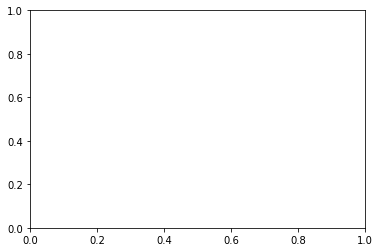

In [24]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title("Experience vs Salary(Training dataset)")
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()